In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

%matplotlib inline

In [2]:

shots = pd.read_csv("../shotcharts-2018-19.csv")
pbp = pd.read_csv("../pbp-2018-19.csv")

In [3]:
pbp.tail()

,Unnamed: 0,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN,PERSON1TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ABBREVIATION,PERSON2TYPE,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ID,PLAYER2_TEAM_CITY,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION
235443,433,21800496,644,8,0,4,11:49 PM,0:38,SUB: Caldwell-Pope FOR Zubac,NaN,NaN,NaN,NaN,4.0,1627826,Ivica Zubac,1.610613e+09,Los Angeles,Lakers,LAL,4,203484,Kentavious Caldwell-Pope,1.610613e+09,Los Angeles,Lakers,LAL,0,0,NaN,NaN,NaN,NaN,NaN
235444,434,21800496,646,1,80,4,11:50 PM,0:25,NaN,NaN,Jackson Jr. 27' 3PT Step Back Jump Shot (27 PTS),107 - 99,-8,5.0,1628991,Jaren Jackson Jr.,1.610613e+09,Memphis,Grizzlies,MEM,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
235445,435,21800496,647,2,6,4,11:50 PM,0:19,MISS James 2' Driving Layup,NaN,Anderson BLOCK (1 BLK),NaN,NaN,4.0,2544,LeBron James,1.610613e+09,Los Angeles,Lakers,LAL,0,0,NaN,NaN,NaN,NaN,NaN,5,203937,Kyle Anderson,1.610613e+09,Memphis,Grizzlies,MEM
235446,436,21800496,649,4,0,4,11:50 PM,0:16,NaN,NaN,Jackson Jr. REBOUND (Off:4 Def:5),NaN,NaN,5.0,1628991,Jaren Jackson Jr.,1.610613e+09,Memphis,Grizzlies,MEM,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
235447,437,21800496,650,13,0,4,11:51 PM,0:00,NaN,NaN,NaN,107 - 99,-8,0.0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN


In [4]:
shots.head()

,Unnamed: 0,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,0,Shot Chart Detail,21800001,114,201143,Al Horford,1610612738,Boston Celtics,1,3,47,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,24,-1,1,1,20181016,BOS,PHI
1,1,Shot Chart Detail,21800001,271,201143,Al Horford,1610612738,Boston Celtics,2,5,7,Made Shot,Alley Oop Layup shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-2,11,1,1,20181016,BOS,PHI
2,2,Shot Chart Detail,21800001,308,201143,Al Horford,1610612738,Boston Celtics,2,2,24,Made Shot,Driving Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-9,7,1,1,20181016,BOS,PHI
3,3,Shot Chart Detail,21800001,353,201143,Al Horford,1610612738,Boston Celtics,3,11,5,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,12,-114,53,1,1,20181016,BOS,PHI
4,4,Shot Chart Detail,21800001,580,201143,Al Horford,1610612738,Boston Celtics,4,7,24,Missed Shot,Fadeaway Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,40,57,1,0,20181016,BOS,PHI


### Filter pbp data for OREB
1. Start by shifting `HOMEDESCRIPTION` and `VISITORDESCRIPTION` to get the next play and create two new columns, `next_Home_desc` and `next_Visitor_desc`
2. Create a new column `creates_OREB` and filter for current description contains `MISS` and next description contains `REBOUND`. 1 if true and 0 if false so that can easily sum to get counts later.
3. Get `three_next`, `four_next`, etc... to attempt to gather points off OREB for shots and FT

In [5]:
pbp['next_Home_desc'] = pbp['HOMEDESCRIPTION'].shift(-1)
pbp['next_Visitor_desc'] = pbp['VISITORDESCRIPTION'].shift(-1)

pbp['two_next_play_event_type'] = pbp['EVENTMSGTYPE'].shift(-2)
pbp['two_next_Home_desc'] = pbp['HOMEDESCRIPTION'].shift(-2)
pbp['two_next_Visitor_desc'] = pbp['VISITORDESCRIPTION'].shift(-2)

pbp['three_next_play_event_type'] = pbp['EVENTMSGTYPE'].shift(-3)
pbp['three_next_Home_desc'] = pbp['HOMEDESCRIPTION'].shift(-3)
pbp['three_next_Visitor_desc'] = pbp['VISITORDESCRIPTION'].shift(-3)

pbp['four_next_play_event_type'] = pbp['EVENTMSGTYPE'].shift(-4)
pbp['four_next_Home_desc'] = pbp['HOMEDESCRIPTION'].shift(-4)
pbp['four_next_Visitor_desc'] = pbp['VISITORDESCRIPTION'].shift(-4)

pbp['five_next_play_event_type'] = pbp['EVENTMSGTYPE'].shift(-5)
pbp['five_next_Home_desc'] = pbp['HOMEDESCRIPTION'].shift(-5)
pbp['five_next_Visitor_desc'] = pbp['VISITORDESCRIPTION'].shift(-5)

pbp['six_next_play_event_type'] = pbp['EVENTMSGTYPE'].shift(-6)
pbp['six_next_Home_desc'] = pbp['HOMEDESCRIPTION'].shift(-6)
pbp['six_next_Visitor_desc'] = pbp['VISITORDESCRIPTION'].shift(-6)

pbp['seven_next_play_event_type'] = pbp['EVENTMSGTYPE'].shift(-7)
pbp['seven_next_Home_desc'] = pbp['HOMEDESCRIPTION'].shift(-7)
pbp['seven_next_Visitor_desc'] = pbp['VISITORDESCRIPTION'].shift(-7)

Conditionally set OREB, OREB outcomes type, and points from OREB 

In [6]:
pbp['creates_OREB'] = np.where(((pbp.next_Home_desc.str.contains('REBOUND'))&(pbp.HOMEDESCRIPTION.str.contains('MISS'))) |
                                ((pbp.next_Visitor_desc.str.contains('REBOUND'))&(pbp.VISITORDESCRIPTION.str.contains('MISS')))
                                 ,
                                1,
                                0
                                )

pbp['OREB_outcome'] = np.where((pbp.creates_OREB == 1)&(pbp.two_next_play_event_type == 1),
                               1,
                               np.where((pbp.creates_OREB == 1)&(pbp.two_next_play_event_type == 6),
                                        6,
                                        0))
pbp['FT1'] = np.where(pbp.OREB_outcome == 6,
                     np.where(((pbp.three_next_play_event_type == 3) & np.logical_not(pbp.three_next_Home_desc.str.contains('MISS')) 
                               & (pd.notnull(pbp.HOMEDESCRIPTION))) |
                              ((pbp.three_next_play_event_type == 3) & np.logical_not(pbp.three_next_Visitor_desc.str.contains('MISS'))
                               & (pd.notnull(pbp.VISITORDESCRIPTION))),
                             1,
                             0),
                      0
                      
                     )

pbp['FT2'] = np.where(pbp.OREB_outcome == 6,
                     np.where(((pbp.four_next_play_event_type == 3) & np.logical_not(pbp.four_next_Home_desc.str.contains('MISS')) 
                               & (pd.notnull(pbp.HOMEDESCRIPTION))) |
                              ((pbp.four_next_play_event_type == 3) & np.logical_not(pbp.four_next_Visitor_desc.str.contains('MISS'))
                               & (pd.notnull(pbp.VISITORDESCRIPTION))),
                             1,
                             0),
                      0
                      
                     )
pbp['FT3'] = np.where(pbp.OREB_outcome == 6,
                     np.where(((pbp.five_next_play_event_type == 3) & np.logical_not(pbp.five_next_Home_desc.str.contains('MISS')) 
                               & (pd.notnull(pbp.HOMEDESCRIPTION))) |
                              ((pbp.five_next_play_event_type == 3) & np.logical_not(pbp.five_next_Visitor_desc.str.contains('MISS'))
                               & (pd.notnull(pbp.VISITORDESCRIPTION))),
                             1,
                             0),
                      0
                      
                     )

pbp['FT4'] = np.where(pbp.OREB_outcome == 6,
                     np.where(((pbp.six_next_play_event_type == 3) & np.logical_not(pbp.six_next_Home_desc.str.contains('MISS')) 
                               & (pd.notnull(pbp.HOMEDESCRIPTION))) |
                              ((pbp.six_next_play_event_type == 3) & np.logical_not(pbp.six_next_Visitor_desc.str.contains('MISS'))
                               & (pd.notnull(pbp.VISITORDESCRIPTION))),
                             1,
                             0),
                      0
                      
                     )
pbp['FT5'] = np.where(pbp.OREB_outcome == 6,
                     np.where(((pbp.seven_next_play_event_type == 3) & np.logical_not(pbp.seven_next_Home_desc.str.contains('MISS')) 
                               & (pd.notnull(pbp.HOMEDESCRIPTION))) |
                              ((pbp.seven_next_play_event_type == 3) & np.logical_not(pbp.seven_next_Visitor_desc.str.contains('MISS'))
                               & (pd.notnull(pbp.VISITORDESCRIPTION))),
                             1,
                             0),
                      0
                      
                     )

pbp['FT_PTS'] = pbp.FT1 + pbp.FT2 + pbp.FT3 + pbp.FT4 + pbp.FT5
pbp['two_next_shot_value'] = np.where((pbp.OREB_outcome == 1),
                                       np.where(((pbp.two_next_Home_desc.str.contains('3PT')) & (pd.notnull(pbp.HOMEDESCRIPTION))) |
                                                ((pbp.two_next_Visitor_desc.str.contains('3PT'))& (pd.notnull(pbp.VISITORDESCRIPTION))),
                                                  3,
                                                  2),
                                      pbp.FT_PTS)
            


In [7]:
pbp

,Unnamed: 0,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN,PERSON1TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ABBREVIATION,PERSON2TYPE,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ID,PLAYER2_TEAM_CITY,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,next_Home_desc,next_Visitor_desc,two_next_play_event_type,two_next_Home_desc,two_next_Visitor_desc,three_next_play_event_type,three_next_Home_desc,three_next_Visitor_desc,four_next_play_event_type,four_next_Home_desc,four_next_Visitor_desc,five_next_play_event_type,five_next_Home_desc,five_next_Visitor_desc,six_next_play_event_type,six_next_Home_desc,six_next_Visitor_desc,seven_next_play_event_type,seven_next_Home_desc,seven_next_Visitor_desc,creates_OREB,OREB_outcome,FT1,FT2,FT3,FT4,FT5,FT_PTS,two_next_shot_value
0,0,21800001,4,10,0,1,8:03 PM,12:00,Jump Ball Horford vs. Embiid: Tip to Simmons,NaN,NaN,NaN,NaN,4.0,201143,Al Horford,1.610613e+09,Boston,Celtics,BOS,5,203954,Joel Embiid,1.610613e+09,Philadelphia,76ers,PHI,5,1627732,Ben Simmons,1.610613e+09,Philadelphia,76ers,PHI,NaN,MISS Covington 27' 3PT Jump Shot,4.0,CELTICS Rebound,NaN,2.0,MISS Tatum 25' 3PT Jump Shot,NaN,4.0,NaN,Saric REBOUND (Off:0 Def:1),5.0,Hayward STEAL (1 STL),Simmons Bad Pass Turnover (P1.T1),2.0,MISS Brown 2' Running Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 Def:1),0,0,0,0,0,0,0,0,0
1,1,21800001,7,2,1,1,8:03 PM,11:40,NaN,NaN,MISS Covington 27' 3PT Jump Shot,NaN,NaN,5.0,203496,Robert Covington,1.610613e+09,Philadelphia,76ers,PHI,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,CELTICS Rebound,NaN,2.0,MISS Tatum 25' 3PT Jump Shot,NaN,4.0,NaN,Saric REBOUND (Off:0 Def:1),5.0,Hayward STEAL (1 STL),Simmons Bad Pass Turnover (P1.T1),2.0,MISS Brown 2' Running Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 Def:1),1.0,NaN,Embiid 1' Running Layup (2 PTS) (Simmons 1 AST),0,0,0,0,0,0,0,0,0
2,2,21800001,8,4,0,1,8:04 PM,11:40,CELTICS Rebound,NaN,NaN,NaN,NaN,2.0,1610612738,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,MISS Tatum 25' 3PT Jump Shot,NaN,4.0,NaN,Saric REBOUND (Off:0 Def:1),5.0,Hayward STEAL (1 STL),Simmons Bad Pass Turnover (P1.T1),2.0,MISS Brown 2' Running Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 Def:1),1.0,NaN,Embiid 1' Running Layup (2 PTS) (Simmons 1 AST),2.0,MISS Tatum 5' Driving Layup,NaN,0,0,0,0,0,0,0,0,0
3,3,21800001,10,2,1,1,8:04 PM,11:15,MISS Tatum 25' 3PT Jump Shot,NaN,NaN,NaN,NaN,4.0,1628369,Jayson Tatum,1.610613e+09,Boston,Celtics,BOS,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Saric REBOUND (Off:0 Def:1),5.0,Hayward STEAL (1 STL),Simmons Bad Pass Turnover (P1.T1),2.0,MISS Brown 2' Running Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 Def:1),1.0,NaN,Embiid 1' Running Layup (2 PTS) (Simmons 1 AST),2.0,MISS Tatum 5' Driving Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 Def:2),0,0,0,0,0,0,0,0,0
4,4,21800001,11,4,0,1,8:04 PM,11:13,NaN,NaN,Saric REBOUND (Off:0 Def:1),NaN,NaN,5.0,203967,Dario Saric,1.610613e+09,Philadelphia,76ers,PHI,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,Hayward STEAL (1 STL),Simmons Bad Pass Turnover (P1.T1),2.0,MISS Brown 2' Running Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 Def:1),1.0,NaN,Embiid 1' Running Layup (2 PTS) (Simmons 1 AST),2.0,MISS Tatum 5' Driving Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 Def:2),2.0,NaN,MISS Saric 26' 3PT Pullup Jump Shot,0,0,0,0,0,0,0,0,0
5,5,21800001,12,5,1,1,8:04 PM,11:08,Hayward STEAL (1 STL),NaN,Simmons Bad Pass Turnover (P1.T1),NaN,NaN,5.0,1627732,Ben Simmons,1.610613e+09,Philadelphia,76ers,PHI,4,202330,Gordon Hayward,1.610613e+09,Boston,Celtics,BOS,0,0,NaN,NaN,NaN,NaN,NaN,MISS Brown 2' Running Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 Def:1),1.0,NaN,Embiid 1' Running Layup (2 PTS) (Simmons 1 AST),2.0,MISS Tatum 5' Driving Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 De

In [8]:
# per stats from https://stats.nba.com/players/misc/?sort=player_NAME&dir=-1&Season=2018-19&SeasonType=Regular%20Season&PerMode=Totals&DateTo=12%2F24%2F2018
# actual 2nd chance points = 13050
print("My 2nd chance points", pbp.two_next_shot_value.sum())
pbp.two_next_shot_value.sum()/13050

My 2nd chance points 10318


0.7906513409961686

In [9]:
#  per stats from https://stats.nba.com/players/traditional/?sort=OREB&dir=-1&Season=2018-19&SeasonType=Regular%20Season&PerMode=Totals&DateTo=12%2F24%2F2018
# actual total OREB = 10273
print(pbp.creates_OREB.sum())
pbp.creates_OREB.sum()/10273

10196


0.9925046237710503

### Merge shotcharts and pbp data
Merge shots with pbp on `GAME_ID` and `EVENTNUM`

In [10]:
shotsPBP = shots.merge(pbp, left_on=["GAME_ID","GAME_EVENT_ID"], right_on=["GAME_ID","EVENTNUM"])


In [11]:
shotsPBP['combined_zone']=shotsPBP['SHOT_ZONE_BASIC']+'_'+shotsPBP['SHOT_ZONE_AREA']+'_'+shotsPBP['SHOT_ZONE_RANGE']+'_'+shotsPBP['SHOT_TYPE']
shotsPBP = shotsPBP[shotsPBP.SHOT_ZONE_RANGE != "Back Court Shot"]
uniquezones = shotsPBP.combined_zone.unique()
uniquezones.sort()
print(uniquezones)
print(uniquezones.shape)

['Above the Break 3_Center(C)_24+ ft._2PT Field Goal'
 'Above the Break 3_Center(C)_24+ ft._3PT Field Goal'
 'Above the Break 3_Left Side Center(LC)_24+ ft._2PT Field Goal'
 'Above the Break 3_Left Side Center(LC)_24+ ft._3PT Field Goal'
 'Above the Break 3_Right Side Center(RC)_24+ ft._2PT Field Goal'
 'Above the Break 3_Right Side Center(RC)_24+ ft._3PT Field Goal'
 'In The Paint (Non-RA)_Center(C)_8-16 ft._2PT Field Goal'
 'In The Paint (Non-RA)_Center(C)_Less Than 8 ft._2PT Field Goal'
 'In The Paint (Non-RA)_Left Side(L)_8-16 ft._2PT Field Goal'
 'In The Paint (Non-RA)_Right Side(R)_8-16 ft._2PT Field Goal'
 'Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal'
 'Mid-Range_Center(C)_16-24 ft._2PT Field Goal'
 'Mid-Range_Center(C)_8-16 ft._2PT Field Goal'
 'Mid-Range_Left Side Center(LC)_16-24 ft._2PT Field Goal'
 'Mid-Range_Left Side Center(LC)_16-24 ft._3PT Field Goal'
 'Mid-Range_Left Side(L)_16-24 ft._2PT Field Goal'
 'Mid-Range_Left Side(L)_16-24 ft._3PT Field Goal'
 'Mid-Range_

Clean up weird shot zones such as midrange 3PT and ATB 2PT

In [12]:


shotsPBP.loc[shotsPBP.combined_zone == 'Above the Break 3_Center(C)_24+ ft._2PT Field Goal', "combined_zone"] = 'Mid-Range_Left Side(L)_16-24 ft._2PT Field Goal'
shotsPBP.loc[shotsPBP.combined_zone == 'Above the Break 3_Left Side Center(LC)_24+ ft._2PT Field Goal', "combined_zone"] = 'Mid-Range_Left Side Center(LC)_16-24 ft._2PT Field Goal'

shotsPBP.loc[shotsPBP.combined_zone == 'Above the Break 3_Right Side Center(RC)_24+ ft._2PT Field Goal', "combined_zone"] = 'Mid-Range_Right Side Center(RC)_16-24 ft._2PT Field Goal'
shotsPBP.loc[shotsPBP.combined_zone == 'Mid-Range_Left Side Center(LC)_16-24 ft._3PT Field Goal', "combined_zone"] = 'Above the Break 3_Left Side Center(LC)_24+ ft._3PT Field Goal'
shotsPBP.loc[shotsPBP.combined_zone == 'Mid-Range_Left Side(L)_16-24 ft._3PT Field Goal', "combined_zone"] = 'Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal'
shotsPBP.loc[shotsPBP.combined_zone == 'Mid-Range_Right Side Center(RC)_16-24 ft._3PT Field Goal', "combined_zone"] = 'Above the Break 3_Right Side Center(RC)_24+ ft._3PT Field Goal'
shotsPBP.loc[shotsPBP.combined_zone == 'Mid-Range_Right Side(R)_16-24 ft._3PT Field Goal', "combined_zone"] = 'Right Corner 3_Right Side(R)_24+ ft._3PT Field Goal'



In [13]:
uniquezones = shotsPBP.combined_zone.unique()
uniquezones.sort()
print(uniquezones)
print(uniquezones.shape)

['Above the Break 3_Center(C)_24+ ft._3PT Field Goal'
 'Above the Break 3_Left Side Center(LC)_24+ ft._3PT Field Goal'
 'Above the Break 3_Right Side Center(RC)_24+ ft._3PT Field Goal'
 'In The Paint (Non-RA)_Center(C)_8-16 ft._2PT Field Goal'
 'In The Paint (Non-RA)_Center(C)_Less Than 8 ft._2PT Field Goal'
 'In The Paint (Non-RA)_Left Side(L)_8-16 ft._2PT Field Goal'
 'In The Paint (Non-RA)_Right Side(R)_8-16 ft._2PT Field Goal'
 'Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal'
 'Mid-Range_Center(C)_16-24 ft._2PT Field Goal'
 'Mid-Range_Center(C)_8-16 ft._2PT Field Goal'
 'Mid-Range_Left Side Center(LC)_16-24 ft._2PT Field Goal'
 'Mid-Range_Left Side(L)_16-24 ft._2PT Field Goal'
 'Mid-Range_Left Side(L)_8-16 ft._2PT Field Goal'
 'Mid-Range_Right Side Center(RC)_16-24 ft._2PT Field Goal'
 'Mid-Range_Right Side(R)_16-24 ft._2PT Field Goal'
 'Mid-Range_Right Side(R)_8-16 ft._2PT Field Goal'
 'Restricted Area_Center(C)_Less Than 8 ft._2PT Field Goal'
 'Right Corner 3_Right Side(R)_24+

### Calculate xpps for each zone
1. Sum `SHOT_ATTEMPTED_FLAG` for each zone to get FGA
2. Sum `SHOT_MADE_FLAG` for each zone to get FGM
3. Calculate FGM/FGA for each zone
1. Sum `creates_OREB` for each zone
2. Sum misses for each zone (FGA - FGM)
3. Calculate OREB%
4. Calculate `pts_per_OREB`
5. Calculate `xpps = ` $FG\% \times shot\_value + (1-FG\%) \times OREB\% \times pts\_per\_OREB$

In [14]:
league_by_zone = shotsPBP.groupby(by="combined_zone", as_index=False).agg({"SHOT_TYPE":"max",
                                                                           "SHOT_MADE_FLAG":"sum",
                                                                            "SHOT_ATTEMPTED_FLAG": "sum",
                                                                           "creates_OREB": "sum",
                                                                                    "two_next_shot_value":"sum"})

league_by_zone.rename(columns={"SHOT_ATTEMPTED_FLAG": "FGA",
                               "creates_OREB": "OREB",
                        "SHOT_MADE_FLAG":"FGM",
                            "two_next_shot_value":"2nd_Chance_Pts"}, inplace=True)
league_by_zone.fillna(0, inplace=True)
league_by_zone["FG%"] = league_by_zone.FGM/league_by_zone.FGA
league_by_zone["MISSES"] = league_by_zone.FGA - league_by_zone.FGM
league_by_zone["OREB%"] = league_by_zone.OREB/league_by_zone.MISSES
league_by_zone["shot_value"] = np.where(league_by_zone.SHOT_TYPE.str.contains('2PT') ,2,3)
league_by_zone["pts_per_OREB"] = league_by_zone["2nd_Chance_Pts"]/league_by_zone["OREB"]
league_by_zone.fillna(0, inplace=True)


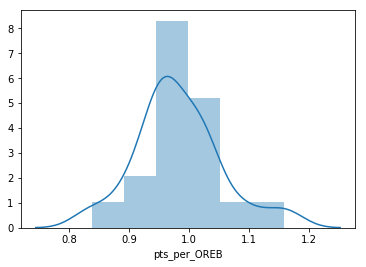

In [15]:
sns.distplot(league_by_zone.pts_per_OREB)

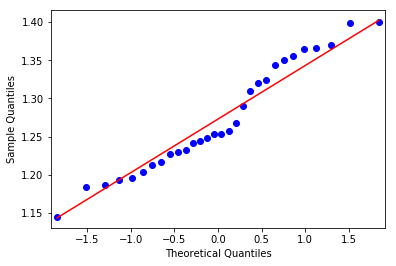

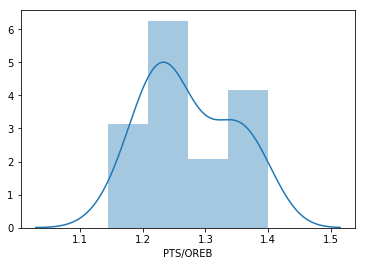

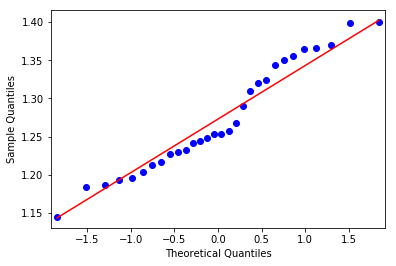

In [16]:
nbaREB = pd.read_csv('../pts_per_OREB-NBA.csv')
nbaREB.dropna(inplace=True)
sns.distplot(nbaREB['PTS/OREB'])

from statsmodels.graphics.gofplots import qqplot

qqplot(nbaREB['PTS/OREB'], line='s')


In [17]:
from scipy.stats import shapiro

stat, p = shapiro(nbaREB['PTS/OREB'])
print(stat, p)

0.9462716579437256 0.13423529267311096


In [19]:
calcMeanPtsOREB= league_by_zone['pts_per_OREB'].mean()
calcStdPtsOREB= league_by_zone['pts_per_OREB'].std()
nbaMeanOREB_PTS= nbaREB['PTS/OREB'].mean()
nbaStdOREB_PTS= nbaREB['PTS/OREB'].std()


In [20]:
league_by_zone['z_pts_per_OREB'] = (league_by_zone.pts_per_OREB - calcMeanPtsOREB)/calcStdPtsOREB

league_by_zone['scaled_pts_per_OREB'] = league_by_zone['z_pts_per_OREB']* nbaStdOREB_PTS + nbaMeanOREB_PTS
league_by_zone['xpps'] = league_by_zone["FG%"] * league_by_zone.shot_value + (1- league_by_zone['FG%'])*league_by_zone["OREB%"]*league_by_zone.scaled_pts_per_OREB

# league_by_zone.sort_values("xpps", ascending=False)

,combined_zone,SHOT_TYPE,FGM,FGA,OREB,2nd_Chance_Pts,FG%,MISSES,OREB%,shot_value,pts_per_OREB,z_pts_per_OREB,scaled_pts_per_OREB,xpps
16,Restricted Area_Center(C)_Less Than 8 ft._2PT ...,2PT Field Goal,18228,29052,3139,3428,0.627427,10824,0.290004,2,1.092068,1.496247,1.379526,1.403908
7,Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal,3PT Field Goal,1374,3541,405,385,0.388026,2167,0.186894,3,0.950617,-0.438608,1.241826,1.306111
17,Right Corner 3_Right Side(R)_24+ ft._3PT Field...,3PT Field Goal,1256,3334,405,421,0.376725,2078,0.194899,3,1.039506,0.777276,1.328358,1.291537
2,Above the Break 3_Right Side Center(RC)_24+ ft...,3PT Field Goal,2977,8476,986,943,0.351227,5499,0.179305,3,0.956389,-0.359652,1.247445,1.198794
1,Above the Break 3_Left Side Center(LC)_24+ ft....,3PT Field Goal,3125,8968,1008,997,0.348461,5843,0.172514,3,0.989087,0.087612,1.279276,1.189174
0,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,2099,6260,627,594,0.335304,4161,0.150685,3,0.947368,-0.483048,1.238663,1.129975
3,In The Paint (Non-RA)_Center(C)_8-16 ft._2PT F...,2PT Field Goal,1905,4578,582,565,0.416121,2673,0.217733,2,0.970790,-0.162666,1.261464,0.992611
5,In The Paint (Non-RA)_Left Side(L)_8-16 ft._2P...,2PT Field Goal,320,814,113,131,0.393120,494,0.228745,2,1.159292,2.415790,1.444968,0.986832
4,In The Paint (Non-RA)_Center(C)_Less Than 8 ft...,2PT Field Goal,2953,7683,1248,1268,0.384355,4730,0.263848,2,1.016026,0.456093,1.305500,0.980771
9,Mid-Range_Center(C)_8-16 ft._2PT Field Goal,2PT Field Goal,412,966,97,87,0.426501,554,0.175090,2,0.896907,-1.173291,1.189540,0.972449


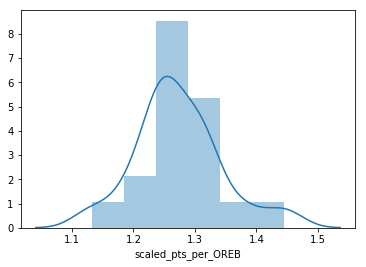

In [32]:
sns.distplot(league_by_zone.scaled_pts_per_OREB)

In [21]:
team_by_zone = shotsPBP.groupby(by=["TEAM_ID","combined_zone"], as_index=False).agg({"SHOT_TYPE":"max",
                                                                                     "TEAM_NAME": "max",
                                                                           "SHOT_MADE_FLAG":"sum",
                                                                            "SHOT_ATTEMPTED_FLAG": "sum",
                                                                           "creates_OREB": "sum",
                                                                                    "two_next_shot_value":"sum"})

team_by_zone.rename(columns={"SHOT_ATTEMPTED_FLAG": "FGA",
                               "creates_OREB": "OREB",
                        "SHOT_MADE_FLAG":"FGM",
                            "two_next_shot_value":"2nd_Chance_Pts"}, inplace=True)
team_by_zone.fillna(0, inplace=True)
team_by_zone["FG%"] = team_by_zone.FGM/team_by_zone.FGA
team_by_zone["MISSES"] = team_by_zone.FGA - team_by_zone.FGM
team_by_zone["OREB%"] = team_by_zone.OREB/team_by_zone.MISSES
team_by_zone["shot_value"] = np.where(team_by_zone.SHOT_TYPE.str.contains('2PT') ,2,3)
team_by_zone["pts_per_OREB"] = team_by_zone["2nd_Chance_Pts"]/team_by_zone["OREB"]
team_by_zone.fillna(0, inplace=True)
team_by_zone['xpps'] = team_by_zone["FG%"] * team_by_zone.shot_value + (1- team_by_zone['FG%'])*team_by_zone["OREB%"]*team_by_zone.pts_per_OREB

team_by_zone.head(18)

,TEAM_ID,combined_zone,SHOT_TYPE,TEAM_NAME,FGM,FGA,OREB,2nd_Chance_Pts,FG%,MISSES,OREB%,shot_value,pts_per_OREB,xpps
0,1610612737,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Atlanta Hawks,75,258,31,29,0.290698,183,0.169399,3,0.935484,0.984496
1,1610612737,Above the Break 3_Left Side Center(LC)_24+ ft....,3PT Field Goal,Atlanta Hawks,81,248,26,22,0.326613,167,0.155689,3,0.846154,1.068548
2,1610612737,Above the Break 3_Right Side Center(RC)_24+ ft...,3PT Field Goal,Atlanta Hawks,88,280,29,30,0.314286,192,0.151042,3,1.034483,1.050000
3,1610612737,In The Paint (Non-RA)_Center(C)_8-16 ft._2PT F...,2PT Field Goal,Atlanta Hawks,62,145,13,8,0.427586,83,0.156627,2,0.615385,0.910345
4,1610612737,In The Paint (Non-RA)_Center(C)_Less Than 8 ft...,2PT Field Goal,Atlanta Hawks,64,196,36,37,0.326531,132,0.272727,2,1.027778,0.841837
5,1610612737,In The Paint (Non-RA)_Left Side(L)_8-16 ft._2P...,2PT Field Goal,Atlanta Hawks,4,19,3,2,0.210526,15,0.200000,2,0.666667,0.526316
6,1610612737,In The Paint (Non-RA)_Right Side(R)_8-16 ft._2...,2PT Field Goal,Atlanta Hawks,8,26,5,2,0.307692,18,0.277778,2,0.400000,0.692308
7,1610612737,Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal,3PT Field Goal,Atlanta Hawks,53,148,15,14,0.358108,95,0.157895,3,0.933333,1.168919
8,1610612737,Mid-Range_Center(C)_16-24 ft._2PT Field Goal,2PT Field Goal,Atlanta Hawks,20,43,6,4,0.465116,23,0.260870,2,0.666667,1.023256
9,1610612737,Mid-Range_Center(C)_8-16 ft._2PT Field Goal,2PT Field Goal,Atlanta Hawks,7,21,1,2,0.333333,14,0.071429,2,2.000000,0.761905


In [22]:
team_by_zone['z_pts_per_OREB'] = (team_by_zone.pts_per_OREB - calcMeanPtsOREB)/calcStdPtsOREB

team_by_zone['scaled_pts_per_OREB'] = team_by_zone['z_pts_per_OREB']* nbaStdOREB_PTS + nbaMeanOREB_PTS
team_by_zone['xpps'] = team_by_zone["FG%"] * team_by_zone.shot_value + (1- team_by_zone['FG%'])*team_by_zone["OREB%"]*team_by_zone.scaled_pts_per_OREB

team_by_zone.sort_values("xpps", ascending=False)

,TEAM_ID,combined_zone,SHOT_TYPE,TEAM_NAME,FGM,FGA,OREB,2nd_Chance_Pts,FG%,MISSES,OREB%,shot_value,pts_per_OREB,xpps,z_pts_per_OREB,scaled_pts_per_OREB
158,1610612745,Mid-Range_Right Side(R)_16-24 ft._2PT Field Goal,2PT Field Goal,Houston Rockets,6,7,0,0,0.857143,1,0.000000,2,0.000000,1.714286,-13.441809,0.316413
539,1610612766,Right Corner 3_Right Side(R)_24+ ft._3PT Field...,3PT Field Goal,Charlotte Hornets,50,99,11,8,0.505051,49,0.224490,3,0.727273,1.628974,-3.493669,1.024403
331,1610612755,Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal,3PT Field Goal,Philadelphia 76ers,30,64,8,9,0.468750,34,0.235294,3,1.125000,1.582698,1.946720,1.411585
131,1610612744,In The Paint (Non-RA)_Left Side(L)_8-16 ft._2P...,2PT Field Goal,Golden State Warriors,19,29,3,7,0.655172,10,0.300000,2,2.333333,1.578057,18.475140,2.587882
133,1610612744,Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal,3PT Field Goal,Golden State Warriors,52,112,15,15,0.464286,60,0.250000,3,1.000000,1.565612,0.236883,1.289899
437,1610612761,In The Paint (Non-RA)_Left Side(L)_8-16 ft._2P...,2PT Field Goal,Toronto Raptors,6,15,5,10,0.400000,9,0.555556,2,2.000000,1.554462,13.915576,2.263386
179,1610612746,Right Corner 3_Right Side(R)_24+ ft._3PT Field...,3PT Field Goal,LA Clippers,30,71,13,15,0.422535,41,0.317073,3,1.153846,1.531207,2.341298,1.439667
398,1610612759,Above the Break 3_Right Side Center(RC)_24+ ft...,3PT Field Goal,San Antonio Spurs,101,217,23,19,0.465438,116,0.198276,3,0.826087,1.515086,-2.142020,1.120597
259,1610612751,Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal,3PT Field Goal,Brooklyn Nets,52,125,20,24,0.416000,73,0.273973,3,1.200000,1.485535,2.972622,1.484597
241,1610612750,Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal,3PT Field Goal,Minnesota Timberwolves,53,126,16,23,0.420635,73,0.219178,3,1.437500,1.479784,6.221312,1.715800


In [23]:
# player_by_zone.groupby('combined_zone')['scaled_pts_per_OREB'].mean()

In [57]:
player_by_zone = shotsPBP.groupby(by=["PLAYER_NAME","combined_zone"], as_index=False).agg({"SHOT_TYPE":"max",
                                                                                           "TEAM_NAME": "max",
                                                                                           "TEAM_ID": "max",
                                                                                           "PLAYER_ID": "max",
                                                                           "SHOT_MADE_FLAG":"sum",
                                                                            "SHOT_ATTEMPTED_FLAG": "sum",
#                                                                            "creates_OREB": "sum",
#                                                                                           "two_next_shot_value":"sum"
                                                                                          })

player_by_zone.rename(columns={"SHOT_ATTEMPTED_FLAG": "FGA",
#                                "creates_OREB": "OREB",
                        "SHOT_MADE_FLAG":"FGM",
#                             "two_next_shot_value":"2nd_Chance_Pts"
                              }, inplace=True)
player_by_zone.fillna(0, inplace=True)
player_by_zone["FG%"] = player_by_zone.FGM/player_by_zone.FGA
# player_by_zone["MISSES"] = player_by_zone.FGA - player_by_zone.FGM
# player_by_zone["OREB%"] = player_by_zone.OREB/player_by_zone.MISSES
player_by_zone["shot_value"] = np.where(player_by_zone.SHOT_TYPE.str.contains('2PT') ,2,3)
# player_by_zone["pts_per_OREB"] = player_by_zone["2nd_Chance_Pts"]/player_by_zone["OREB"]
# player_by_zone.fillna(0, inplace=True)
player_by_zone = player_by_zone.merge(team_by_zone[['TEAM_ID','combined_zone','scaled_pts_per_OREB','OREB%']], on=['TEAM_ID','combined_zone'])
player_by_zone
# team_by_zone.iloc[:,np.r_[0:2,6:16]]




,PLAYER_NAME,combined_zone,SHOT_TYPE,TEAM_NAME,TEAM_ID,PLAYER_ID,FGM,FGA,FG%,shot_value,scaled_pts_per_OREB,OREB%
0,Aaron Gordon,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Orlando Magic,1610612753,203932,6,22,0.272727,3,1.633483,0.106918
1,D.J. Augustin,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Orlando Magic,1610612753,201571,6,22,0.272727,3,1.633483,0.106918
2,Evan Fournier,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Orlando Magic,1610612753,203095,7,39,0.179487,3,1.633483,0.106918
3,Jarell Martin,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Orlando Magic,1610612753,1626185,0,2,0.000000,3,1.633483,0.106918
4,Jerian Grant,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Orlando Magic,1610612753,1626170,4,16,0.250000,3,1.633483,0.106918
5,Jonathan Isaac,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Orlando Magic,1610612753,1628371,6,15,0.400000,3,1.633483,0.106918
6,Jonathon Simmons,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Orlando Magic,1610612753,203613,1,8,0.125000,3,1.633483,0.106918
7,Mo Bamba,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Orlando Magic,1610612753,1628964,3,16,0.187500,3,1.633483,0.106918
8,Nikola Vucevic,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Orlando Magic,1610612753,202696,17,48,0.354167,3,1.633483,0.106918
9,Terrence Ross,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Orlando Magic,1610612753,203082,9,28,0.321429,3,1.633483,0.106918


In [58]:

player_by_zone['xpps'] = player_by_zone["FG%"] * player_by_zone.shot_value + (1- player_by_zone['FG%'])*player_by_zone["OREB%"]*player_by_zone.scaled_pts_per_OREB

player_by_zone.sort_values("xpps", ascending=False)

,PLAYER_NAME,combined_zone,SHOT_TYPE,TEAM_NAME,TEAM_ID,PLAYER_ID,FGM,FGA,FG%,shot_value,scaled_pts_per_OREB,OREB%,xpps
4148,Vincent Edwards,Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal,3PT Field Goal,Houston Rockets,1610612745,1629053,1,1,1.0,3,1.136191,0.231707,3.000000
3436,Willie Cauley-Stein,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Sacramento Kings,1610612758,1626161,1,1,1.0,3,1.046528,0.111111,3.000000
4888,Jalen Jones,Right Corner 3_Right Side(R)_24+ ft._3PT Field...,3PT Field Goal,Cleveland Cavaliers,1610612739,1627883,1,1,1.0,3,1.533271,0.190476,3.000000
2379,Jared Terrell,Above the Break 3_Right Side Center(RC)_24+ ft...,3PT Field Goal,Minnesota Timberwolves,1610612750,1629123,1,1,1.0,3,1.654957,0.223776,3.000000
810,Thabo Sefolosha,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Utah Jazz,1610612762,200757,1,1,1.0,3,1.289899,0.107143,3.000000
2366,James Nunnally,Above the Break 3_Left Side Center(LC)_24+ ft....,3PT Field Goal,Minnesota Timberwolves,1610612750,203263,1,1,1.0,3,1.352705,0.164894,3.000000
2722,Chandler Hutchison,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Chicago Bulls,1610612741,1628990,1,1,1.0,3,1.073569,0.118421,3.000000
2975,Chasson Randle,Above the Break 3_Right Side Center(RC)_24+ ft...,3PT Field Goal,Washington Wizards,1610612764,1626184,1,1,1.0,3,1.317713,0.167464,3.000000
2146,Khyri Thomas,Right Corner 3_Right Side(R)_24+ ft._3PT Field...,3PT Field Goal,Detroit Pistons,1610612765,1629017,1,1,1.0,3,1.192551,0.131579,3.000000
5675,Willy Hernangomez,Right Corner 3_Right Side(R)_24+ ft._3PT Field...,3PT Field Goal,Charlotte Hornets,1610612766,1626195,2,2,1.0,3,1.024403,0.224490,3.000000


In [59]:
player_by_zone[player_by_zone.PLAYER_NAME == "Stephen Curry"]

,PLAYER_NAME,combined_zone,SHOT_TYPE,TEAM_NAME,TEAM_ID,PLAYER_ID,FGM,FGA,FG%,shot_value,scaled_pts_per_OREB,OREB%,xpps
1285,Stephen Curry,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Golden State Warriors,1610612744,201939,25,53,0.471698,3,1.134142,0.198413,1.533977
1297,Stephen Curry,Above the Break 3_Left Side Center(LC)_24+ ft....,3PT Field Goal,Golden State Warriors,1610612744,201939,41,81,0.506173,3,1.204004,0.159624,1.613426
1309,Stephen Curry,Above the Break 3_Right Side Center(RC)_24+ ft...,3PT Field Goal,Golden State Warriors,1610612744,201939,26,70,0.371429,3,1.372749,0.248677,1.328862
1322,Stephen Curry,In The Paint (Non-RA)_Center(C)_8-16 ft._2PT F...,2PT Field Goal,Golden State Warriors,1610612744,201939,1,8,0.125000,2,1.017323,0.206612,0.433917
1336,Stephen Curry,In The Paint (Non-RA)_Center(C)_Less Than 8 ft...,2PT Field Goal,Golden State Warriors,1610612744,201939,13,24,0.541667,2,1.150830,0.256098,1.218416
1345,Stephen Curry,In The Paint (Non-RA)_Right Side(R)_8-16 ft._2...,2PT Field Goal,Golden State Warriors,1610612744,201939,1,1,1.000000,2,0.316413,0.166667,2.000000
1355,Stephen Curry,Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal,3PT Field Goal,Golden State Warriors,1610612744,201939,17,29,0.586207,3,1.289899,0.250000,1.892059
1367,Stephen Curry,Mid-Range_Center(C)_16-24 ft._2PT Field Goal,2PT Field Goal,Golden State Warriors,1610612744,201939,6,13,0.461538,2,0.559784,0.148148,0.967732
1379,Stephen Curry,Mid-Range_Left Side(L)_8-16 ft._2PT Field Goal,2PT Field Goal,Golden State Warriors,1610612744,201939,4,7,0.571429,2,1.289899,0.185185,1.245230
1392,Stephen Curry,Mid-Range_Right Side Center(RC)_16-24 ft._2PT ...,2PT Field Goal,Golden State Warriors,1610612744,201939,8,18,0.444444,2,1.679294,0.148515,1.027445


In [60]:
league_by_zone.to_csv("league-xpps.csv")

In [61]:
team_by_zone.to_csv("team-xpps.csv")

In [62]:
player_by_zone.to_csv("player-xpps.csv")

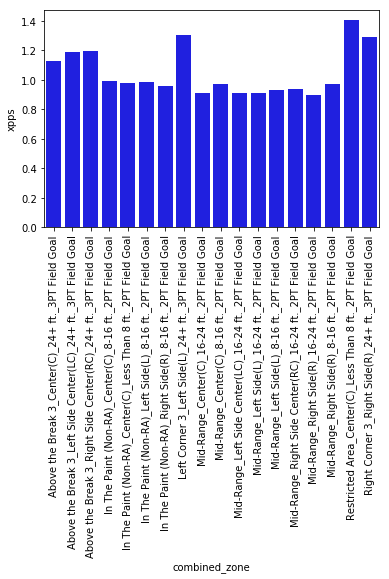

In [63]:
ax = sns.barplot(x="combined_zone", y="xpps", data=league_by_zone, color='blue')
for item in ax.get_xticklabels():
    item.set_rotation(90)

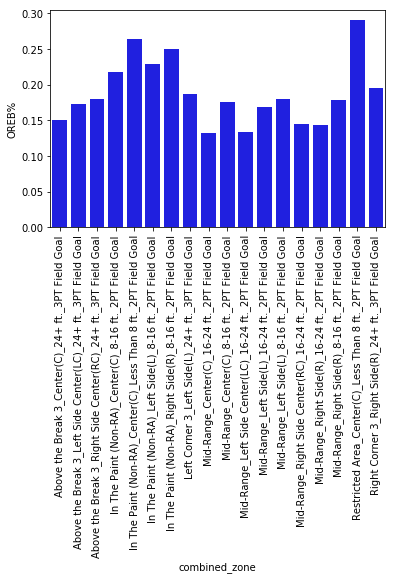

In [64]:
ax = sns.barplot(x="combined_zone", y="OREB%", data=league_by_zone, color='blue')
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [327]:
from matplotlib.patches import Circle, Rectangle, Arc, Wedge, Path
import matplotlib.patches as patches

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    
    
    left_corner_3_box = Rectangle((-250, -47.5), 30, 140.5, linewidth=lw, color=color,
                          fill=False)
    right_corner_3_box = Rectangle((220, -47.5), 30, 140.5, linewidth=lw, color=color,
                          fill=False)


    verts = [
       (-250., 92.),   # P0
       (-250.,250.),  # P1
       (-110.,275.),  # P2
       (-110., 275.),
       (-90., 217.),
        (-110., 220.),
        (-210., 140.),
        (-220., 92.)
    ]

    codes = [
        Path.MOVETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.LINETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4
        
    ]

    path = Path(verts, codes)
    atb_left_patch = patches.PathPatch(path, fill=False, facecolor=color, lw=lw)
    
    verts = [
       (-110., 275.),   # P0
       (0.,310.),  # P1
       (110.,275.),  # P2
       (110., 275.),
       (90., 217.),
        (0., 260.),
        (-90., 217.),
        (-90., 217.)
    ]

    codes = [
        Path.MOVETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.LINETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4
        
    ]

    path = Path(verts, codes)
    atb_top_patch = patches.PathPatch(path, fill=False, facecolor=color, lw=lw)
    
    verts = [
       (250., 92.),   # P0
       (250.,250.),  # P1
       (100.,275.),  # P2
       (110., 275.),
       (90., 217.),
        (110., 220.),
        (210., 140.),
        (220., 92.)
    ]

    codes = [
        Path.MOVETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.LINETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4
        
    ]

    path = Path(verts, codes)
    atb_right_patch = patches.PathPatch(path, fill=False, facecolor=color, lw=lw)
    
    ra_zone = Wedge((0., -6.5), 44, 0, 180, fill=False, color=color)
    itp_center_under_8 = Rectangle((-80, 40), 160, 40, linewidth=lw, color=color,
                          fill=False)
    itp_center_over_8 = Rectangle((-80, 80), 160, 64, linewidth=lw, color=color,
                          fill=False)
    
    itp_left = Rectangle((-80, -6.5), 80, 46.5, linewidth=lw, color=color,
                          fill=False)
    itp_right = Rectangle((0, -6.5), 80, 46.5, linewidth=lw, color=color,
                          fill=False)
    
    lmr_left = Rectangle((-220, -47.5), 70, 142, linewidth=lw, color=color,
                          fill=False)
    smr_left = Rectangle((-150, -47.5), 70, 142, linewidth=lw, color=color,
                          fill=False)
    lmr_right = Rectangle((150, -47.5), 70, 142, linewidth=lw, color=color,
                          fill=False)
    smr_right = Rectangle((80, -47.5), 70, 142, linewidth=lw, color=color,
                          fill=False)
    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc, left_corner_3_box, atb_left_patch, atb_top_patch,
                     atb_right_patch, right_corner_3_box, itp_center_under_8, 
                      itp_center_over_8, itp_left,itp_right, ra_zone, lmr_left, smr_left,
                     lmr_right, smr_right]
    
    
    

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
    
    ax.set_frame_on(False)
#     ax.axes.get_yaxis().set_visible(False)
    return ax

(-100, 500)

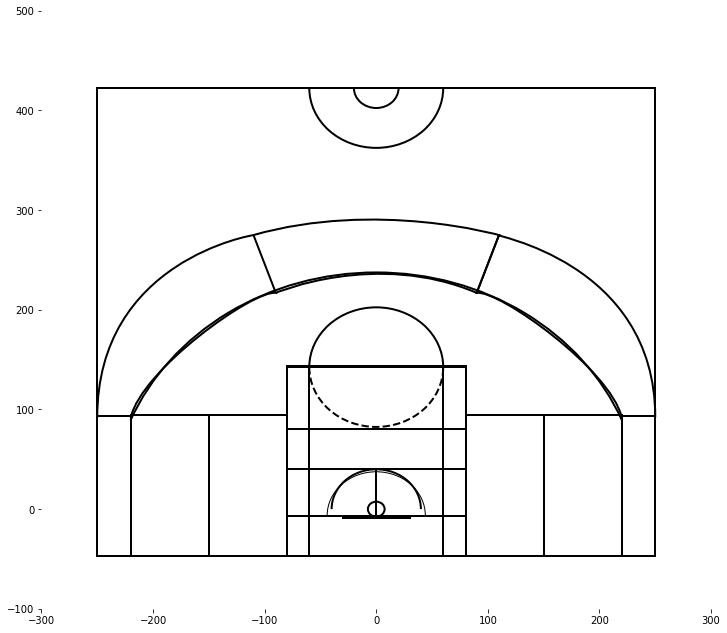

In [328]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
